In [1]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


import matplotlib.pyplot as plt
import seaborn as sns

from acquire import get_titanic_data
from prepare import prep_titanic_data, split

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

# acquire
from env import host, user, password
from pydataset import data

In [2]:
# Acquire titanic data.

df = get_titanic_data()
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [3]:


# Prepare titanic dataset

df = prep_titanic_data(df)
df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_encode
0,0,0,3,male,1,0,7.2500,S,Third,Southampton,0,3
1,1,1,1,female,1,0,71.2833,C,First,Cherbourg,0,0
2,2,1,3,female,0,0,7.9250,S,Third,Southampton,1,3
3,3,1,1,female,1,0,53.1000,S,First,Southampton,0,3
4,4,0,3,male,0,0,8.0500,S,Third,Southampton,1,3


In [4]:
#loading the prepped titanic data and 
#splitting it into train, validate, and test 
train, validate, test = split(df)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 689 to 281
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_id     498 non-null    int64  
 1   survived         498 non-null    int64  
 2   pclass           498 non-null    int64  
 3   sex              498 non-null    object 
 4   sibsp            498 non-null    int64  
 5   parch            498 non-null    int64  
 6   fare             498 non-null    float64
 7   embarked         498 non-null    object 
 8   class            498 non-null    object 
 9   embark_town      498 non-null    object 
 10  alone            498 non-null    int64  
 11  embarked_encode  498 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 50.6+ KB


In [5]:
train.shape, validate.shape, test.shape

((498, 12), (214, 12), (179, 12))

In [6]:
X_train = train.drop(columns=["survived"])
y_train = train.survived

X_validate = validate.drop(columns=["survived"])
y_validate = validate.survived

X_test = test.drop(columns=["survived"])
y_test = test.survived

In [7]:
# 1
# Compute the baseline accuracy


y_train[0:10]

689    1
84     1
738    0
441    0
643    1
877    0
29     0
411    0
858    1
363    0
Name: survived, dtype: int64

In [8]:

train.survived.value_counts()

0    302
1    196
Name: survived, dtype: int64

In [9]:
# The mode is a great baseline
baseline = y_train.mode()

# Produce a boolean array with True representing a match between the baseline prediction and reality
matches_baseline_prediction = (y_train == 0)

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline accuracy: 0.61


In [10]:
# 2

#creating an example model based of the curriculum
X_train = train[['pclass', 'age', 'fare', 'sibsp', 'parch']]
y_train = train[['survived']]

KeyError: "['age'] not in index"

In [ ]:
#calling the Logistic Regression function and saving it 
#under the variable called logit for shorthand
logit = LogisticRegression()

In [ ]:
#fitting the train dataframe into a logistic regression model
logit.fit(X_train, y_train)

In [ ]:
#KNN 

In [11]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import prepare
import acquire

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
train, validate, test = split(df)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 689 to 281
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_id     498 non-null    int64  
 1   survived         498 non-null    int64  
 2   pclass           498 non-null    int64  
 3   sex              498 non-null    object 
 4   sibsp            498 non-null    int64  
 5   parch            498 non-null    int64  
 6   fare             498 non-null    float64
 7   embarked         498 non-null    object 
 8   class            498 non-null    object 
 9   embark_town      498 non-null    object 
 10  alone            498 non-null    int64  
 11  embarked_encode  498 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 50.6+ KB


In [13]:
train.shape, validate.shape, test.shape

((498, 12), (214, 12), (179, 12))

In [14]:
train.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_encode
689,689,1,1,female,0,1,211.3375,S,First,Southampton,0,3
84,84,1,2,female,0,0,10.5000,S,Second,Southampton,1,3
738,738,0,3,male,0,0,7.8958,S,Third,Southampton,1,3
441,441,0,3,male,0,0,9.5000,S,Third,Southampton,1,3
643,643,1,3,male,0,0,56.4958,S,Third,Southampton,1,3


In [16]:
x_cols = ['pclass', 'alone', 'fare']
y_col = 'survived'

X_train, y_train = train[x_cols], train[y_col]
X_validate, y_validate = validate[x_cols], validate[y_col]
X_test, y_test = test[x_cols], test[y_col]

In [17]:

X_train.head()

,pclass,alone,fare
689,1,0,211.3375
84,2,1,10.5000
738,3,1,7.8958
441,3,1,9.5000
643,3,1,56.4958


In [20]:
# knn classifier with n_neighbour = 1

knn1 = KNeighborsClassifier(1)
knn1.fit(X_train, y_train)
# get_classification_metrics(knn)
y_pred = knn1.predict(X_train)

In [21]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.80      0.83       302
           1       0.72      0.79      0.75       196

    accuracy                           0.80       498
   macro avg       0.79      0.80      0.79       498
weighted avg       0.80      0.80      0.80       498



In [22]:
report = classification_report(y_train, y_pred, output_dict=True)
print("n_neighbour = 1")
pd.DataFrame(report)

n_neighbour = 1


,0,1,accuracy,macro avg,weighted avg
precision,0.852632,0.723005,0.797189,0.787818,0.801614
recall,0.804636,0.785714,0.797189,0.795175,0.797189
f1-score,0.827939,0.753056,0.797189,0.790497,0.798467
support,302.000000,196.000000,0.797189,498.000000,498.000000


In [23]:
confusion_matrix(y_train, y_pred)

array([[243,  59],
       [ 42, 154]])

In [24]:
print('Actual on Left, Predicted on Top')
pd.crosstab(y_train, y_pred)

Actual on Left, Predicted on Top


col_0,0,1
survived,,
0,243,59
1,42,154


In [25]:
TN, FP, FN, TP = confusion_matrix(y_train,y_pred).ravel()
ALL = TP + TN + FP + FN

TN, FP, FN, TP 

(243, 59, 42, 154)

In [26]:
def show_scores(TN, FP, FN, TP):
    
    ALL = TP + TN + FP + FN
    
    accuracy = (TP + TN)/ALL # How often did the model get it right?
    precision = TP/(TP+FP) # What is the quality of a positive prediction made by the model?
    recall = TP/(TP+FN) # How many of the true positives were found?   
    
    true_positive_rate = TP/(TP+FN) # Same as recall, actually
    true_negative_rate = TN/(TN+FP) # How many of the true negatives were found?
    false_positive_rate = FP/(FP+TN) # How often did we miss the negative and accidentally call it positive?
    false_negative_rate = FN/(FN+TP) # How often did we miss the positive and accidentally call it negative?
    
    f1_score = 2*(precision*recall)/(precision+recall) # Harmonic mean, good for imbalanced data sets
    support_pos = TP + FN # Number of actual positives in the sample
    support_neg = FP + TN # Number of actual negatives in the sample
    
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"True Positive Rate: {true_positive_rate}")
    print(f"True Negative Rate: {true_negative_rate}")
    print(f"False Positive Rate: {false_positive_rate}")
    print(f"False Negative Rate: {false_negative_rate}")
    print(f"F1 Score: {f1_score}")
    print(f"Support (0): {support_pos}")
    print(f"Support (1): {support_neg}")

In [27]:
show_scores(TN, FP, FN, TP)

Accuracy: 0.7971887550200804
Precision: 0.7230046948356808
Recall: 0.7857142857142857
True Positive Rate: 0.7857142857142857
True Negative Rate: 0.804635761589404
False Positive Rate: 0.19536423841059603
False Negative Rate: 0.21428571428571427
F1 Score: 0.7530562347188263
Support (0): 196
Support (1): 302


In [28]:
# knn classifier with n_neighbour = 10

knn2 = KNeighborsClassifier(10)
knn2.fit(X_train, y_train)
y_pred = knn2.predict(X_train)

report = classification_report(y_train, y_pred, output_dict=True)
print("n_neighbour = 10")
pd.DataFrame(report)

n_neighbour = 10


,0,1,accuracy,macro avg,weighted avg
precision,0.723647,0.673469,0.708835,0.698558,0.703898
recall,0.841060,0.505102,0.708835,0.673081,0.708835
f1-score,0.777948,0.577259,0.708835,0.677604,0.698962
support,302.000000,196.000000,0.708835,498.000000,498.000000


In [29]:
# confusion_matrix
print('Actual on Left, Predicted on Top')
pd.crosstab(y_train, y_pred)

Actual on Left, Predicted on Top


col_0,0,1
survived,,
0,254,48
1,97,99


In [30]:
# knn classifier with n_neighbour = 20

knn3 = KNeighborsClassifier(20)
knn3.fit(X_train, y_train)
y_pred = knn3.predict(X_train)

report = classification_report(y_train, y_pred, output_dict=True)
print("n_neighbour = 20")
pd.DataFrame(report)

n_neighbour = 20


,0,1,accuracy,macro avg,weighted avg
precision,0.725948,0.658065,0.704819,0.692006,0.699231
recall,0.824503,0.520408,0.704819,0.672456,0.704819
f1-score,0.772093,0.581197,0.704819,0.676645,0.696961
support,302.000000,196.000000,0.704819,498.000000,498.000000


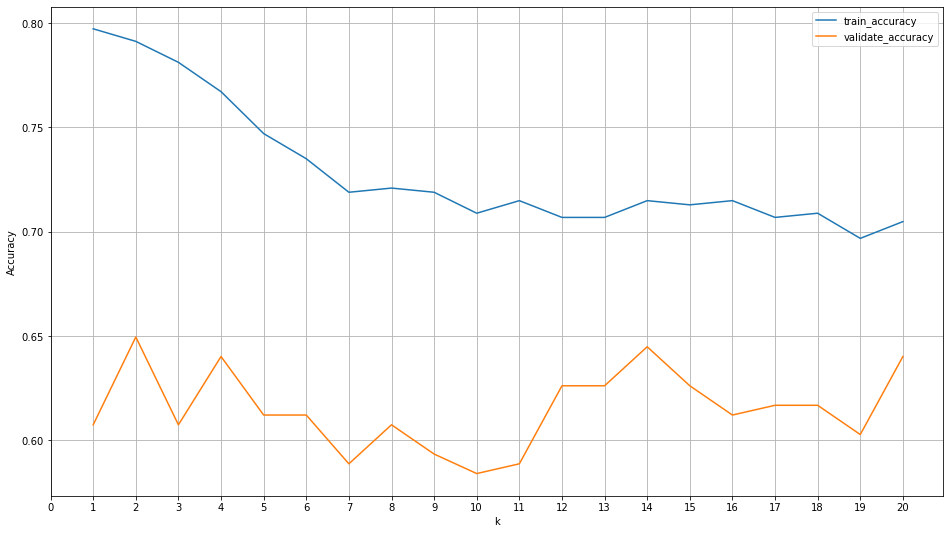

In [31]:
metrics = []

# loop through different values of k
for k in range(1, 21):
            
    # define the thing
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # fit the thing (remmeber only fit on training data)
    knn.fit(X_train, y_train)
    
    # use the thing (calculate accuracy)
    train_accuracy = knn.score(X_train, y_train)
    validate_accuracy = knn.score(X_validate, y_validate)
    
    output = {
        "k": k,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy
    }
    
    metrics.append(output)

# make a dataframe
results = pd.DataFrame(metrics)

# plot the data
results.set_index('k').plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

In [39]:
# Logistical Regression

import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
# Exercise 1

In [33]:
# Acquire titanic data.

titanic = acquire.get_titanic_data()
titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [36]:
# Prepare titanic dataset

train, validate, test = split(df)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 689 to 281
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_id     498 non-null    int64  
 1   survived         498 non-null    int64  
 2   pclass           498 non-null    int64  
 3   sex              498 non-null    object 
 4   sibsp            498 non-null    int64  
 5   parch            498 non-null    int64  
 6   fare             498 non-null    float64
 7   embarked         498 non-null    object 
 8   class            498 non-null    object 
 9   embark_town      498 non-null    object 
 10  alone            498 non-null    int64  
 11  embarked_encode  498 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 50.6+ KB


In [37]:
# Compute the baseline accuracy

train.survived.value_counts(normalize=True)

0    0.606426
1    0.393574
Name: survived, dtype: float64

In [41]:
# fare and pclass are the X in model1.

x_train_model1 = train[['fare', 'pclass', 'age']]
y_train_model1 = train[['survived']]

x_train_model1.shape, y_train_model1.shape

((498, 2), (498, 1))

In [43]:
y_train_model1.head()

,survived
689,1
84,1
738,0
441,0
643,1


In [44]:
# Define the logistic regression model
logit = LogisticRegression(C=1, random_state=123)

In [45]:
#  fit the model on train data
logit.fit(x_train_model1, y_train_model1)

LogisticRegression(C=1, random_state=123)

In [46]:
# now use the model to make predictions
y_pred = logit.predict(x_train_model1)

In [47]:
#take a look at predictions
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,

In [48]:
# look at probability of being in certain class for each observation
logit.predict_proba(x_train_model1)[:10]

array([[0.23023626, 0.76976374],
       [0.58340626, 0.41659374],
       [0.74944917, 0.25055083],
       [0.74825466, 0.25174534],
       [0.71161888, 0.28838112],
       [0.74944917, 0.25055083],
       [0.74944917, 0.25055083],
       [0.7502197 , 0.2497803 ],
       [0.74090743, 0.25909257],
       [0.75007745, 0.24992255]])

In [49]:
# look at classes attribute
logit.classes_

array([0, 1])

In [50]:
# View raw probabilities (output from the model)

y_pred_proba = logit.predict_proba(x_train_model1)
y_pred_proba = pd.DataFrame(y_pred_proba, columns = ['fare', 'pclass'])
y_pred_proba.head()

,fare,pclass
0,0.230236,0.769764
1,0.583406,0.416594
2,0.749449,0.250551
3,0.748255,0.251745
4,0.711619,0.288381


In [51]:
# classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.86      0.77       302
           1       0.67      0.43      0.53       196

    accuracy                           0.69       498
   macro avg       0.69      0.65      0.65       498
weighted avg       0.69      0.69      0.68       498



In [59]:
# Compute the accuracy

print(logit.score(x_train_model1, y_train_model1))


0.6927710843373494


In [58]:
train.survived.value_counts(normalize=True)

0    0.606426
1    0.393574
Name: survived, dtype: float64

In [61]:
train.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_encode
689,689,1,1,female,0,1,211.3375,S,First,Southampton,0,3
84,84,1,2,female,0,0,10.5000,S,Second,Southampton,1,3
738,738,0,3,male,0,0,7.8958,S,Third,Southampton,1,3
441,441,0,3,male,0,0,9.5000,S,Third,Southampton,1,3
643,643,1,3,male,0,0,56.4958,S,Third,Southampton,1,3


In [62]:
sex_dummy = pd.get_dummies(train.sex)
train = pd.concat([train, sex_dummy], axis=1)
train.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_encode,female,male
689,689,1,1,female,0,1,211.3375,S,First,Southampton,0,3,1,0
84,84,1,2,female,0,0,10.5000,S,Second,Southampton,1,3,1,0
738,738,0,3,male,0,0,7.8958,S,Third,Southampton,1,3,0,1
441,441,0,3,male,0,0,9.5000,S,Third,Southampton,1,3,0,1
643,643,1,3,male,0,0,56.4958,S,Third,Southampton,1,3,0,1


In [63]:

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 689 to 281
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passenger_id     498 non-null    int64  
 1   survived         498 non-null    int64  
 2   pclass           498 non-null    int64  
 3   sex              498 non-null    object 
 4   sibsp            498 non-null    int64  
 5   parch            498 non-null    int64  
 6   fare             498 non-null    float64
 7   embarked         498 non-null    object 
 8   class            498 non-null    object 
 9   embark_town      498 non-null    object 
 10  alone            498 non-null    int64  
 11  embarked_encode  498 non-null    int64  
 12  female           498 non-null    uint8  
 13  male             498 non-null    uint8  
dtypes: float64(1), int64(7), object(4), uint8(2)
memory usage: 51.6+ KB


In [64]:
# Model 3

# fare, pclass, age, and male are the X in model2.

x_train_model3 = train[['fare', 'pclass', 'male']]
y_train_model3 = train[['survived']]

x_train_model3.shape, y_train_model3.shape

((498, 3), (498, 1))

In [67]:
# Create the logistic regression object

logit3 = LogisticRegression(C=1)

# Fit the model to the training data

logit3.fit(x_train_model3, y_train_model3)

# Print the coefficients and intercept of the model

print('Coefficient: \n', logit3.coef_)
print('Intercept: \n', logit3.intercept_)

# Estimate whether or not a passenger would survive, using the training data

y_pred_model3 = logit3.predict(x_train_model3)
y_pred_model3

# Estimate the probablity of a passenger surviving, using the training data
y_pred_proba_model3 = logit3.predict_proba(x_train_model3)

Coefficient: 
 [[ 6.45217331e-04 -9.82560488e-01 -2.43702120e+00]]
Intercept: 
 [3.23313519]


In [69]:
# Compute the accuracy

print('Accuracy: {: .2f}'.format(logit3.score(x_train_model3, y_train_model3)))

# Create a confusion matrix

print('Confusion matrix: ', confusion_matrix(y_train_model3, y_pred_model3))

# Compute Precision, Recall, F1-score, and Support

print(classification_report(y_train_model3, y_pred_model3))

Accuracy:  0.78
Confusion matrix:  [[255  47]
 [ 64 132]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       302
           1       0.74      0.67      0.70       196

    accuracy                           0.78       498
   macro avg       0.77      0.76      0.76       498
weighted avg       0.77      0.78      0.78       498

